# Nummer 1: Analyse, Interpretation und Bereinigung der Daten


## Aufgabe
- Fahrzeugdatensatz ist mit Hilfe statistischer Standardfunktionen zu analysieren, interpretieren und ggfs. bereinigen
- Visuelle Darstellungsarten in verschiedenen Diagrammen, um wichtige Zusammenhänge zu visualisieren
- Kommentare, um interessante Erkenntnisse festzuhalten

## Erste Notizen 

### Crisp-DM

#### Phase: Data Unterstanding
- Welche Daten liegen vor?
  - Fahrzeugdaten, in dem verschiedene Merkmale von Fahrzeugen genannt werden
  - Format CSV-Datei
  - Anzahl der Dimensionen: 9 (inkl. der Klassenatttribute)
  - Anzahl der Datenpunkte: 406 
  - Attribute:
    1. **mpg**:           continuous
    2. **cylinders**:     multi-valued discrete
    3. **displacement**:  continuous
    4. **horsepower**:    continuous
    5. **weight**:        continuous
    6. **acceleration**:  continuous
    7. **model year**:    multi-valued discrete
    8. **origin**:        multi-valued discrete
    9. **car name**:      string (unique for each instance)
  - Zusatz:
    - horsepower fehlen 6 Attributwerte
    - mpg fehlen 8 Attributwerte

- Wie sehen diese Daten aus? Könnte es Probleme mit den Daten geben?
  - im csv format
  - fehlende Attribute bei mpg und horsepower (NA) 
    - könnten zu Probleme führen
    - unvollständige Datensätze sollten entfernt werden
  - Attribute getrennt durch verschieden viele Leerzeichen
  - Zeile = Datensatz
- Kann man "auf den ersten Blick" Zusammenhänge erkennen?
  - Gewicht und MPG korreliert negativ
  - PS und Hubraum korellieren negativ
  - Hubraum und Gewicht korrelieren positiv
- Wie können beispielhafte Antworten oder Ergebnisse aussehen? 

#### Phase: Data Preparation
- Können die Daten in der vorliegenden Form verwendet werden?
  - ja könnten sie
  - könnten aber zu verfälschenden Ergebnissen führen
- Wie können diese vorverarbeitet werden, um sie zu verwenden?
  - Unvollständige Datensätze entfernen

### Attribute-Übersetzung

- **MPG**: A car’s mpg figure will tell you approximately how far it’ll travel using a single UK gallon (4.55 litres) of fuel.
- **Cylinders**: Zylinder
- **Displacement**: Hubraum
- **Horsepower**: PS
- **Weight**: Gewicht
- **Acceleration**: Beschleunigung
- **Model Year**: Modelljahr
- **Origin**: Generation?
- **Car Name**: Autobezeichung


### Imports

In [1]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

### Vorbereitung der CSV Datei
Hier werden die zur Verfügung gestellte Datei so bearbeitet, dass sie im nachfolgenden Schritt leichter als CSV Datei eingelesen werden kann. Dafür werden die Abstände zwischen den einzelnen Attributen auf ein Leerzeichen gekürzt. Die Datei wird anschließend als _autodata.csv_ im Ordner _data_ gespeichert.

In [2]:
pd.set_option('display.max_columns', None)
# Manipulate data
f = open("../data/auto-mpg.data-original")
content = f.read()
f.close()
while content != content.replace('  ', ' '):
    content = content.replace('  ', ' ')
content = content.replace('\t', ' ')
# print(content)

f = open("../data/autodata.csv", "w")
f.write(content)
f.close()

### Einlesen der CSV Datei

In [3]:
# readin data 
col_labels=('mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year', 'origin', 'car name')
pd.options.display.float_format = '{:,.2f}'.format
df = pd.read_csv("../data/autodata.csv", delimiter=" ", header=None, names=col_labels)

### Info

In [4]:
print("Dimensionen: ", end='')
print(df.shape)


Dimensionen: (406, 9)


##### Ergebnis
406 Dimensionen á 9 Datenpunkte

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406 entries, 0 to 405
Data columns (total 9 columns):
mpg             398 non-null float64
cylinders       406 non-null float64
displacement    406 non-null float64
horsepower      400 non-null float64
weight          406 non-null float64
acceleration    406 non-null float64
model year      406 non-null float64
origin          406 non-null float64
car name        406 non-null object
dtypes: float64(8), object(1)
memory usage: 28.6+ KB


### Auszug der ersten 15 Datensätze

In [6]:
# show top 15 of table
df.head(15)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.00,8.00,307.00,130.00,"3,504.00",12.00,70.00,1.00,chevrolet chevelle malibu
1,15.00,8.00,350.00,165.00,"3,693.00",11.50,70.00,1.00,buick skylark 320
2,18.00,8.00,318.00,150.00,"3,436.00",11.00,70.00,1.00,plymouth satellite
3,16.00,8.00,304.00,150.00,"3,433.00",12.00,70.00,1.00,amc rebel sst
4,17.00,8.00,302.00,140.00,"3,449.00",10.50,70.00,1.00,ford torino
5,15.00,8.00,429.00,198.00,"4,341.00",10.00,70.00,1.00,ford galaxie 500
6,14.00,8.00,454.00,220.00,"4,354.00",9.00,70.00,1.00,chevrolet impala
7,14.00,8.00,440.00,215.00,"4,312.00",8.50,70.00,1.00,plymouth fury iii
8,14.00,8.00,455.00,225.00,"4,425.00",10.00,70.00,1.00,pontiac catalina
9,15.00,8.00,390.00,190.00,"3,850.00",8.50,70.00,1.00,amc ambassador dpl


Wie man in den Datensätzen 10 bis 14 sehen kann, sind die Datensätze nicht alle vollständig. Deswegen würde es sich im nächsten Schritt anbieten, die Daten von unvollständigen Datensätzen zu bereinigen.

### Statistische Tabelle ohne Bereinigung

In [7]:
# Describe the data
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
count,398.00,406.00,406.00,400.00,406.00,406.00,406.00,406.00
mean,23.51,5.48,194.78,105.08,"2,979.41",15.52,75.92,1.57
std,7.82,1.71,104.92,38.77,847.00,2.80,3.75,0.80
min,9.00,3.00,68.00,46.00,"1,613.00",8.00,70.00,1.00
25%,17.50,4.00,105.00,75.75,"2,226.50",13.70,73.00,1.00
50%,23.00,4.00,151.00,95.00,"2,822.50",15.50,76.00,1.00
75%,29.00,8.00,302.00,130.00,"3,618.25",17.17,79.00,2.00
max,46.60,8.00,455.00,230.00,"5,140.00",24.80,82.00,3.00


### Statistische Tabelle mit Bereinigung

In [8]:
df_with_correction = df[df['mpg'].notnull()]
df_with_correction = df_with_correction[df_with_correction['horsepower'].notnull()]
print('Dimensions after corretion: ', end='')
print(df_with_correction.shape)
df_with_correction.describe()

Dimensions after corretion: (392, 9)


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
count,392.00,392.00,392.00,392.00,392.00,392.00,392.00,392.00
mean,23.45,5.47,194.41,104.47,"2,977.58",15.54,75.98,1.58
std,7.81,1.71,104.64,38.49,849.40,2.76,3.68,0.81
min,9.00,3.00,68.00,46.00,"1,613.00",8.00,70.00,1.00
25%,17.00,4.00,105.00,75.00,"2,225.25",13.78,73.00,1.00
50%,22.75,4.00,151.00,93.50,"2,803.50",15.50,76.00,1.00
75%,29.00,8.00,275.75,126.00,"3,614.75",17.02,79.00,2.00
max,46.60,8.00,455.00,230.00,"5,140.00",24.80,82.00,3.00


Nach der Bereinigung wurden 14 Datensätze entfernt. Dies führte dazu, dass sich die statistischen Kennwerte teilweise noch verändert haben (Vergleiche obrigen Tabellen). 

### Verteilung einzelner Attribute

Cylinders


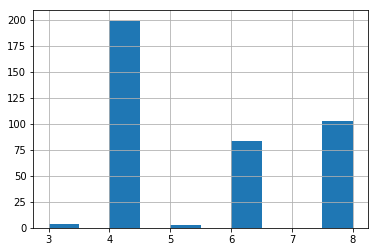

In [9]:
print('Cylinders')
df_with_correction['cylinders'].hist()

Origin


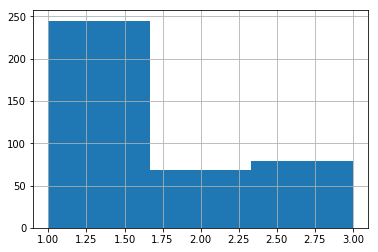

In [10]:
print('Origin')
df_with_correction['origin'].hist(bins=3)

Model year


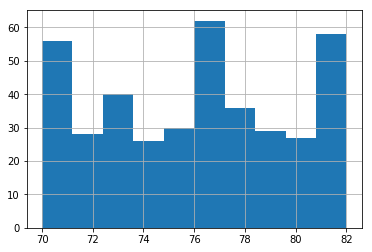

In [11]:
print('Model year')
df_with_correction['model year'].hist()

mpg


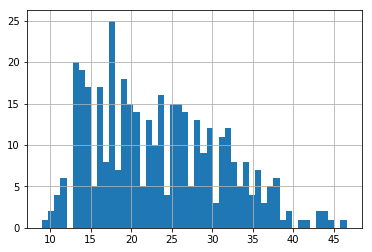

In [12]:
print('mpg')
df_with_correction['mpg'].hist(bins=50)

Displacement


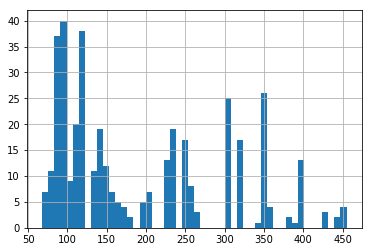

In [13]:
print('Displacement')
df_with_correction['displacement'].hist(bins=50)

Horsepower


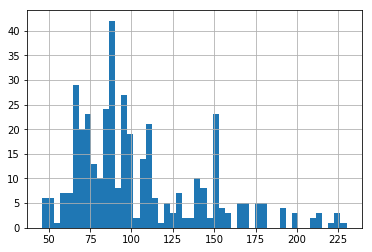

In [14]:
print('Horsepower')
df_with_correction['horsepower'].hist(bins=50)

Weight


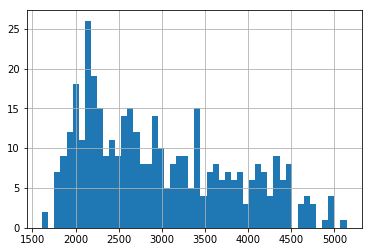

In [15]:
print('Weight')
df_with_correction['weight'].hist(bins=50)
#sns.distplot(df_with_correction['weight'], bins=50, kde=False, rug=True)

### Visualisierung

Da Zylinder, Generationen und Modelljahr diskrete Variablen sind, bietet es sich an, einen dieser Attribute inform von farblicher Hinterlegung in die paarweisen Diagramme mit einzubinden. Nachfolgend wurde sich für die Zylinderzahl entschieden. 

#### Paarweises Plotten 

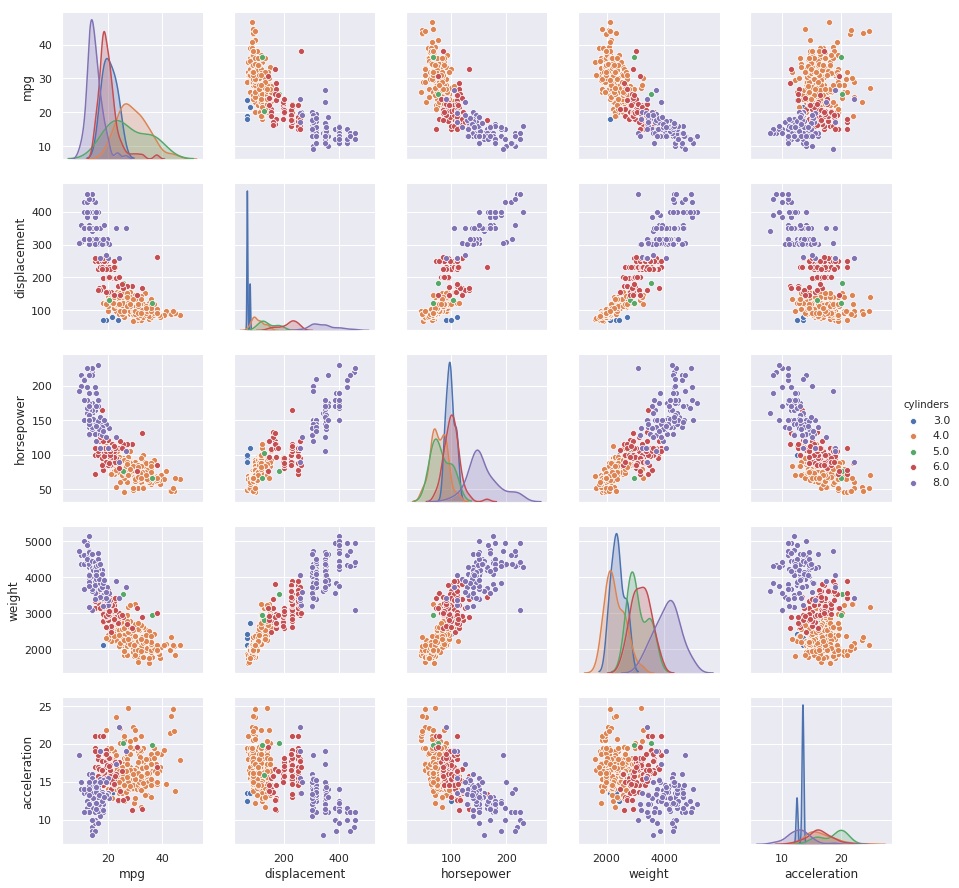

In [16]:
# This creates a matrix of axes and shows the relationship for each pair of columns in a DataFrame. by default, it also draws the univariate distribution of each variable on the diagonal Axes:
cols=('mpg', 'displacement', 'horsepower', 'weight', 'acceleration')
sns.set(color_codes=True)
sns.pairplot(df_with_correction, hue='cylinders', vars=cols)

#### Hervorhebung einzelner Diagramme

MPG


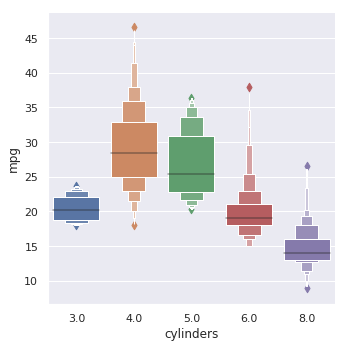

In [17]:
print('MPG')
sns.catplot(x="cylinders", y="mpg", data=df_with_correction, kind="boxen")


Das erste Diagramm lässt vermuten, dass je niedriger die Zylinderzahl eines Autos ist desto höher ist die MPG (niedriger ist der Benzinverbrauch) (negative Korrelation). Allerdings fallen die Werte der 3-Zylinder-Fahrzeuge ein bisschen aus dieser Vermutung heraus. 

In [18]:
np.corrcoef(df_with_correction['cylinders'], df_with_correction['mpg'] )


array([[ 1.        , -0.77761751],
       [-0.77761751,  1.        ]])

Die Korrelation der beiden liegt bei -0.77, was für die vorherige Vermutung nochmal unterstreicht.

### Korrelation einzelner Attribute
#### Gewicht und MPG


In [19]:
x = df_with_correction['weight']
y = df_with_correction['mpg'] 
np.corrcoef(x, y)

array([[ 1.        , -0.83224421],
       [-0.83224421,  1.        ]])

Die Korrelation zwischen Gewicht und MPG liegt bei -0.83, was bedeutet, dass eine sehr hohe negative Korrelation zwischen diesen Attributen vorliegt. Das heißt, dass je höher das Gewicht eines Fahrzeuges ist, desto höher ist der Spritverbrauch bzw. so geringer ist die MPG.

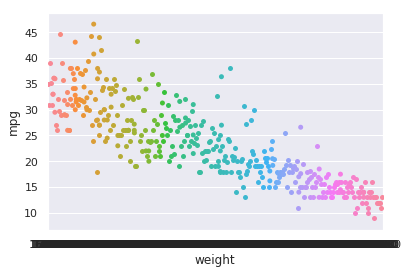

In [20]:
sns.stripplot(x="weight", y="mpg", data=df_with_correction, jitter=True)

#### Beschleunigung und Hubraum

In [21]:
x = df_with_correction['acceleration']
y = df_with_correction['displacement'] 
np.corrcoef(x, y)

array([[ 1.       , -0.5438005],
       [-0.5438005,  1.       ]])

Zwischen PS und MPG gibt es eine mäßig bis hohe negative Korrelation.

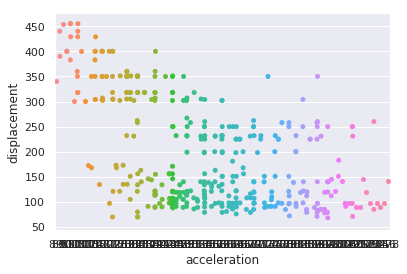

In [22]:
sns.stripplot(x="acceleration", y="displacement", data=df_with_correction, jitter=True)

#### Hubraum und Gewicht

In [23]:
x = df_with_correction['displacement']
y = df_with_correction['weight'] 
np.corrcoef(x, y)

array([[1.       , 0.9329944],
       [0.9329944, 1.       ]])

Zwischen Hubraum und Gewicht gibt es eine hohe positive Korrelaton.

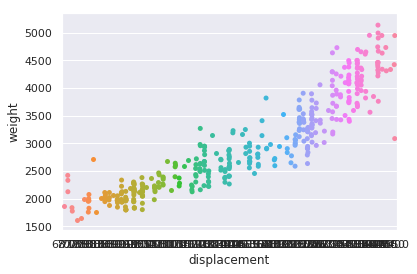

In [24]:
sns.stripplot(x="displacement", y="weight", data=df_with_correction, jitter=True)

# Nummer 2: Vorhersage der PS-Zahl

## Aufgabe
- Zwei verschiedene Vorhersageverfahren
- PS-Zahl eines gegebenen Datensatzes ohne PS-Zahl vorherzusagen

### Weiterhin zu beantworten
- Validieren und testen der Ergebnisse mit Evaluationsmethoden
- Ergebnis der Verfahren vergleichbar optisch darstellen
- Beschreibung des Endergebnisses
- Diskussion, welche Lösung sich entschieden wird
- Optimierung einer bis maximal drei Interationen
- Kommentar, welche weitern Möglichkeiten es gibt
- Methode
  - Manuelle Eingabe Werte
  - Vorhersage treffen 
  - Optische Darstellung

### Weitere Importe

In [25]:
from sklearn import linear_model, metrics
from sklearn.model_selection import train_test_split
from numpy.polynomial.polynomial import polyfit
from sklearn.tree import DecisionTreeRegressor
#from sklearn import preprocessing

### Funktionen

In [26]:
# function for horsepower prediction
# ([],model)->([])
def predict_horsepower(given_values, model):
    prediction = model.predict(given_values)
    print("Given=%s, Predicted Horsepower: %s" % (given_values, prediction[0]))
    return prediction

def plot_overview_diagram(title, label, data):
    x_train = data['x_train']
    y_train = data['y_train']
    x_test = data['x_test']
    y_test = data['y_test']
    y_predict = data['y_predict']
    fig, ax = plt.subplots()
    x_label_name = label['x']
    y_label_name = label['y']

    # Descriptions
    plt.title(title)
    plt.xlabel(x_label_name.capitalize())
    plt.ylabel(y_label_name.capitalize())
    
    # Graphs
    ax.scatter(x_train[x_label_name], y_train, color='yellow', label='train')
    ax.scatter(x_test[x_label_name], y_test, color='blue', label='test')
    ax.scatter(x_test[x_label_name], y_predict, color='red', label='predict')

    # Polynomial curve fitting (linear)
    b, m = polyfit(x_train[x_label_name], y_train, 1)
    # Linear function
    plt.plot(x_test[x_label_name], m * np.array(x_test[x_label_name] + b), '--', color='green')

    
    legend = ax.legend(loc='upper left', shadow=True)

    # Put a nicer background color on the legend.
    legend.get_frame().set_facecolor('C0')

    plt.show()
    
def print_scores(model, data):
    # Accuracy
    print('Accuracy: ', model.score(data['x_test'], data['y_test']))
    # Mean squared error
    print('Mean squared error: ', metrics.mean_squared_error(data['y_test'], data['y_predict']))

## Lineare Regression

### Erstellung des Models mit einer Testgröße von 0.2

In [27]:
# split dataframe into data and target
x_t2 = pd.DataFrame(df_with_correction, columns=['mpg', 'cylinders', 'displacement', 'weight', 'acceleration', 'model year', 'origin'])
y_t2 = df_with_correction['horsepower']
labels_t2 = {'x':'displacement', 'y': 'horsepower'}

# create training and testing vars
data_lr = dict()
data_lr['x_train'], data_lr['x_test'], data_lr['y_train'], data_lr['y_test'] = train_test_split(x_t2, y_t2, test_size=0.2)

# fit the model on the training data 
lm = linear_model.LinearRegression()
lm = lm.fit(data_lr['x_train'], data_lr['y_train'])

data_lr['y_predict'] = lm.predict(data_lr['x_test'])
# print out the first 10 predictions
print(data_lr['y_predict'][0:10])

# lm.score(x, y)

[148.95786823 149.77876629  66.15831479 146.72848152  60.44777058
  76.44736041 176.52926639 165.4415011   89.15963103  72.41918033]


#### Diagramm mit den vorausgesagte und den wahren Werten

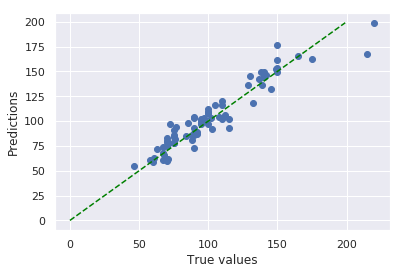

In [28]:
# plot the model 
plt.scatter(data_lr['y_test'], data_lr['y_predict'])
# descriptions
plt.xlabel("True values")
plt.ylabel("Predictions")
# diagonal (where prediction = real value)
plt.plot(range(0,200), range(0,200), '--', color='green')

In [29]:
print_scores(lm, data_lr)

Accuracy:  0.8963580771547041
Mean squared error:  122.05524478077541


###### Results
**Accuracy**:  89.46   
**Mean squared error**:  131.59   

Die Genauigkeit nach dem ersten Durchlauf mit einer Testgröße von 0.2 liegt bereits bei einem Wert von 89.46 Prozent. Der MSE hingegen beträgt noch einen Wert von 131.59, was definitiv noch ausbaufähig ist.

##### Übersichtsdiagramm  

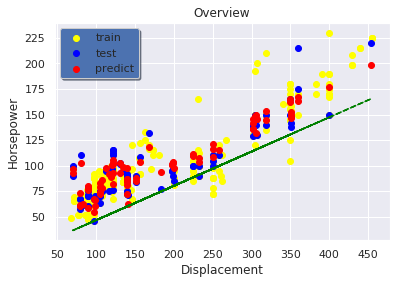

In [30]:
plot_overview_diagram('Overview', labels_t2, data_lr)

### Optimierung: Testgröße von 0.3

In [31]:
# create training and testing vars
data_lr_opt = dict()
data_lr_opt['x_train'], data_lr_opt['x_test'], data_lr_opt['y_train'], data_lr_opt['y_test'] = train_test_split(x_t2, y_t2, test_size=0.3)

# fit the model on the training data 

lm_opt = linear_model.LinearRegression()
lm_opt = lm_opt.fit(data_lr_opt['x_train'], data_lr_opt['y_train'])

data_lr_opt['y_predict'] = lm_opt.predict(data_lr_opt['x_test'])

##### Übersichtsdiagramm-Vergleich

Not optimized (0.2 test size)


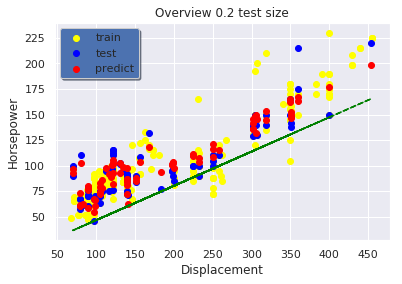

Optimized (0.3 test size)


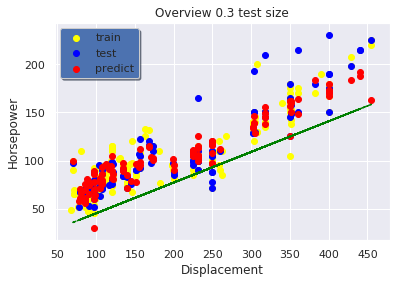

In [32]:
print('Not optimized (0.2 test size)')
plot_overview_diagram('Overview 0.2 test size', labels_t2, data_lr)
print('Optimized (0.3 test size)')
plot_overview_diagram('Overview 0.3 test size', labels_t2, data_lr_opt)

In [33]:
print_scores(lm_opt, data_lr_opt)

Accuracy:  0.8649920982964387
Mean squared error:  243.49607832948544


###### Results
**Accuracy**:  92.39   
**Mean squared error**:  109.20   

Im Vergleich zum nicht optimierten Modell, konnte dieses Modell sich nochmal um knapp 3 Prozent und verbessern, und den MSE nochmals um 22 reduzieren. Dies kann man auch gut beim Vergleich der beiden Diagramme erkennen.

### Decision Tree - Regression

In [34]:

# create training and testing vars
data_reg = dict()
data_reg['x_train'], data_reg['x_test'], data_reg['y_train'], data_reg['y_test'] = train_test_split(x_t2, y_t2, test_size=0.3)

# fit the model on the training data 
regressor = DecisionTreeRegressor(random_state=1)
regressor = regressor.fit(data_reg['x_train'], data_reg['y_train'])

data_reg['y_predict'] = regressor.predict(data_reg['x_test'])


##### Übersichtsdiagramm  

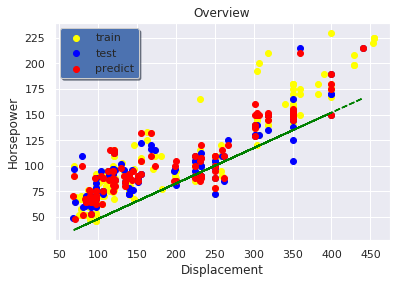

In [35]:
plot_overview_diagram('Overview', labels_t2, data_reg)

In [36]:
print_scores(regressor, data_reg)

Accuracy:  0.8332023557245384
Mean squared error:  174.01694915254237


###### Results
**Accuracy**:  88.62   
**Mean squared error**:  179.89   
Die hohe MSE spiegelt sich auch im obigen Diagramm inform der vielen roten Ausreißer wieder.

### Gegenüberstellung: _Entscheidungsbaum_ vs _Lineare Regression_

In [37]:
print("Prediction for dataset without horsepower:")
test_value = [[25., 4., 98., 2046., 19., 71., 1.]]
print("Linear Regression")
prediction = predict_horsepower(test_value, lm)
print("Decision Tree")
prediction = predict_horsepower(test_value, regressor)

Prediction for dataset without horsepower:
Linear Regression
Given=[[25.0, 4.0, 98.0, 2046.0, 19.0, 71.0, 1.0]], Predicted Horsepower: 60.76822449317635
Decision Tree
Given=[[25.0, 4.0, 98.0, 2046.0, 19.0, 71.0, 1.0]], Predicted Horsepower: 70.0


##### Übersichtsdiagramm-Vergleich

Linear Regression


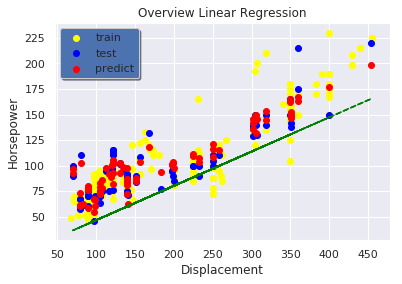

Decision Tree


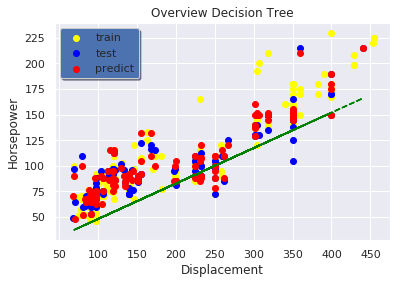

In [38]:
print('Linear Regression')
plot_overview_diagram('Overview Linear Regression', labels_t2, data_lr)
print('Decision Tree')
plot_overview_diagram('Overview Decision Tree', labels_t2, data_reg)

Obwohl die Genauigkeit des Entscheidungsbaums kaum schlechter ist als die der linearen Regression, unterscheidet sich die MSE schon deutlich um knapp 50. Dies kann man auch sehr gut im Diagramm des Decision Trees erkennen, da hier viel größer Ausreißer zu finden sind. Aufgrunddessen würde ich in diesem Fall das lineare Regressions-Modell dem Entscheidungsbaum-Modell vorziehen.

### Weitere Optimierungsmöglichkeiten
- Mehr Datensätze zum Trainieren geben
- Reduktion der Dimensionen
- Ausreißer entfernen


# Nummer 3: 

## Aufgabe
- zwei Klassifikationsverfahren
- um Fahrzeuge bei sonstigen Daten eine Zylinderzahl zuzuordnen

### Weiterhin zu beantworten
- Validieren und testen der Ergebnisse mit Evaluationsmethoden
- Ergebnis der Verfahren vergleichbar optisch darstellen
- Beschreibung des Endergebnisses
- Diskussion, welche Lösung sich entschieden wird
- Optimierung einer bis maximal drei Interationen
- Kommentar, welche weitern Möglichkeiten es gibt
- Methode
  - Manuelle Eingabe Werte
  - Vorhersage treffen 
  - Optische Darstellung
  
  

### Weitere Importe


In [39]:
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix 

from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix

### Funktionen

In [40]:
# classifies cylinders of car datasets
def classify_cylinders(cars, model):
    predictions = model.predict(cars)
    for i in range(0, len(cars)):
        print("Given=%s, Classified Cylinders: %s" % (cars[i], predictions[i]))
    return prediction

### kNN - k-Nearest Neighbors

In [41]:
# split dataframe into data and target
# this time is the aim the cylinders of the car
column_names_t3 = ['mpg', 'horsepower', 'displacement', 'weight', 'acceleration', 'model year', 'origin']
x_t3 = pd.DataFrame(df_with_correction, columns=column_names_t3)
y_t3 = df_with_correction['cylinders']
labels_t3 = {'x':'displacement', 'y': 'cylinders'}

# create training and testing vars
data_t3 = dict()
data_t3['x_train'], data_t3['x_test'], data_t3['y_train'], data_t3['y_test'] = train_test_split(x_t3, y_t3, test_size=0.2)


#### Training für K=5

In [42]:
data_knn = data_t3.copy()

# feature scaling
scaler = preprocessing.StandardScaler()  
scaler.fit(data_knn['x_train'])

data_knn['x_train'] = scaler.transform(data_knn['x_train'])
data_knn['x_test'] = scaler.transform(data_knn['x_test'])
# value of K ()
knn_5 = KNeighborsClassifier(n_neighbors=5)
knn_5.fit(data_knn['x_train'], data_knn['y_train'])

# make prediction on the test data
data_knn['y_predict'] = knn_5.predict(data_knn['x_test'])

print(confusion_matrix(data_knn['y_test'], data_knn['y_predict']))  
print(classification_report(data_knn['y_test'], data_knn['y_predict'])) 


[[ 0  1  0  0  0]
 [ 0 38  0  0  0]
 [ 0  1  0  0  0]
 [ 0  2  0 18  0]
 [ 0  0  0  0 19]]
              precision    recall  f1-score   support

         3.0       0.00      0.00      0.00         1
         4.0       0.90      1.00      0.95        38
         5.0       0.00      0.00      0.00         1
         6.0       1.00      0.90      0.95        20
         8.0       1.00      1.00      1.00        19

   micro avg       0.95      0.95      0.95        79
   macro avg       0.58      0.58      0.58        79
weighted avg       0.93      0.95      0.94        79



/home/mosera/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/mosera/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/mosera/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Wie man in oberen Ausgabe erkennen kann, kann der KNN Algorithmus bereits mit einer durschnittlichen Genauigkeit von 94 Prozent richtig vorhersagen, wieviele Zylinder das gegebene Auto hat. Dafür wurde als Wert für K 5 festgesetzt. Im nächsten Schritt soll das K optimiert werden, um an eine noch bessere Präzision des Algorithmuses zu kommen.

#### Optimierung: Vergleich der Errorrate mit dem K-Wert

In [43]:
# calculating error values for different k value
error = []
k_max = 100
k_min = 2
for i in range(k_min, k_max):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(data_knn['x_train'], data_knn['y_train'])
    pred_i = knn.predict(data_knn['x_test'])
    # append error 
    error.append(np.mean(pred_i != data_knn['y_test']))


Text(0, 0.5, 'Mean Error')

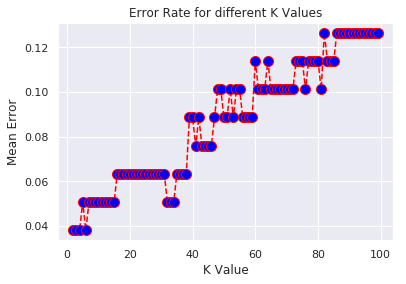

In [44]:
# plot errors
plt.plot(range(k_min, k_max), error, color='red', linestyle='dashed', marker='o', markerfacecolor='blue', markersize=10)
# description
plt.title('Error Rate for different K Values')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

Wie man im oberen Diagramm sehen kann, gibt es mehrere Werte für K , welche einen ungefähren Mean Error von 0.04 erreichen. Nachfolgend wurde sich für jeodch für einen K-Wer von 2 entschieden, da dieser laut dem Diagramm einen ungefähren Durschnittsfehler von unter 0.01 erreicht.

#### Training für K=2

In [45]:
# value of K ()
data_knn_opt = data_knn.copy()
knn_2 = KNeighborsClassifier(n_neighbors=2)
knn_2.fit(data_knn_opt['x_train'], data_knn_opt['y_train'])

# make prediction on the test data
data_knn_opt['y_predict'] = knn_2.predict(data_knn_opt['x_test'])

print(confusion_matrix(data_knn_opt['y_test'], data_knn_opt['y_predict']))  
print(classification_report(data_knn_opt['y_test'], data_knn_opt['y_predict'])) 

[[ 0  1  0  0  0]
 [ 0 38  0  0  0]
 [ 0  1  0  0  0]
 [ 0  1  0 19  0]
 [ 0  0  0  0 19]]
              precision    recall  f1-score   support

         3.0       0.00      0.00      0.00         1
         4.0       0.93      1.00      0.96        38
         5.0       0.00      0.00      0.00         1
         6.0       1.00      0.95      0.97        20
         8.0       1.00      1.00      1.00        19

   micro avg       0.96      0.96      0.96        79
   macro avg       0.59      0.59      0.59        79
weighted avg       0.94      0.96      0.95        79



/home/mosera/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/mosera/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/mosera/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Wenn man die beiden Tabellen für K=5 und K=2 vergleicht erkennt man, dass die Präzision des KNN-Algorithmus nochmal um einen Wert von 0.05 verbessern konnte.

##### Vergleich DIagramm

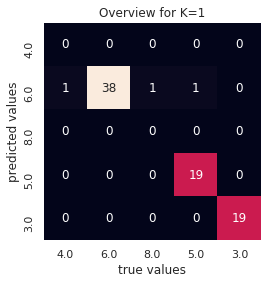

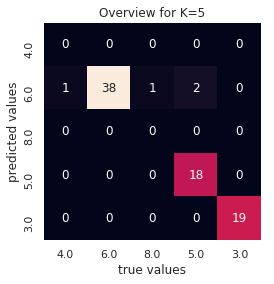

In [46]:
different_cylinder = data_knn_opt['y_test'].unique()

# plot data in a matrix
mat = confusion_matrix(data_knn_opt['y_test'], data_knn_opt['y_predict'])
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=different_cylinder, yticklabels=different_cylinder)
plt.title('Overview for K=1')
plt.xlabel('true values')
plt.ylabel('predicted values')
plt.show()

different_cylinder = data_knn['y_test'].unique()

# plot data in a matrix
mat = confusion_matrix(data_knn['y_test'], data_knn['y_predict'])
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=different_cylinder, yticklabels=different_cylinder)
plt.title('Overview for K=5')
plt.xlabel('true values')
plt.ylabel('predicted values')
plt.show()

In [47]:
'''import matplotlib
# matplotlib.use('GTKAgg')
 
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets


n_neighbors = 2
h = .02

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA','#00AAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00','#00AAFF'])

# calculate min, max and limits
x_min, x_max = x_t3['displacement'].min() - 1, x_t3['displacement'].max() + 1
print(x_min, x_max)
y_min, y_max = y_t3.min() - 1, y_t3.max() + 1
print(y_min, y_max)
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
np.arange(y_min, y_max, h))
Z = knn_2.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("3-Class classification (k = %i)" % (n_neighbors))
plt.show()'''

'import matplotlib\n# matplotlib.use(\'GTKAgg\')\n \nimport numpy as np\nimport matplotlib.pyplot as plt\nfrom matplotlib.colors import ListedColormap\nfrom sklearn import neighbors, datasets\n\n\nn_neighbors = 2\nh = .02\n\n# Create color maps\ncmap_light = ListedColormap([\'#FFAAAA\', \'#AAFFAA\',\'#00AAFF\'])\ncmap_bold = ListedColormap([\'#FF0000\', \'#00FF00\',\'#00AAFF\'])\n\n# calculate min, max and limits\nx_min, x_max = x_t3[\'displacement\'].min() - 1, x_t3[\'displacement\'].max() + 1\nprint(x_min, x_max)\ny_min, y_max = y_t3.min() - 1, y_t3.max() + 1\nprint(y_min, y_max)\nxx, yy = np.meshgrid(np.arange(x_min, x_max, h),\nnp.arange(y_min, y_max, h))\nZ = knn_2.predict(np.c_[xx.ravel(), yy.ravel()])\n\n# Put the result into a color plot\nZ = Z.reshape(xx.shape)\nplt.figure()\nplt.pcolormesh(xx, yy, Z, cmap=cmap_light)\n\n# Plot also the training points\nplt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)\nplt.xlim(xx.min(), xx.max())\nplt.ylim(yy.min(), yy.max())\nplt.title("3-

### Gaussian Naive Bayes


In [48]:
nb_model = MultinomialNB()

data_nb = data_t3.copy()
#print(data_nb)
nb_model.fit(data_nb['x_train'], data_nb['y_train'])

data_nb['y_predict'] = nb_model.predict(data_nb['x_test'])


Text(89.18, 0.5, 'predicted values')

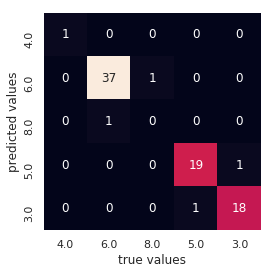

In [49]:
#different_cylinder = df_with_correction.cylinders.unique()
different_cylinder = data_nb['y_test'].unique()

# plot data in a matrix
mat = confusion_matrix(data_nb['y_test'], data_nb['y_predict'])
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=different_cylinder, yticklabels=different_cylinder)
plt.title('Overview for Naive Bayes')
plt.xlabel('true values')
plt.ylabel('predicted values')

In [50]:
print(confusion_matrix(data_nb['y_test'], data_nb['y_predict']))  
print(classification_report(data_nb['y_test'], data_nb['y_predict'])) 

[[ 1  0  0  0  0]
 [ 0 37  1  0  0]
 [ 0  1  0  0  0]
 [ 0  0  0 19  1]
 [ 0  0  0  1 18]]
              precision    recall  f1-score   support

         3.0       1.00      1.00      1.00         1
         4.0       0.97      0.97      0.97        38
         5.0       0.00      0.00      0.00         1
         6.0       0.95      0.95      0.95        20
         8.0       0.95      0.95      0.95        19

   micro avg       0.95      0.95      0.95        79
   macro avg       0.77      0.77      0.77        79
weighted avg       0.95      0.95      0.95        79



### Gaussian Naive Bayes vs kNN

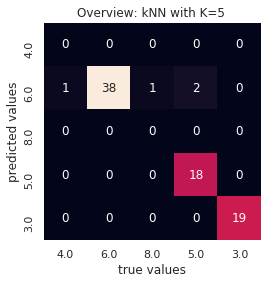

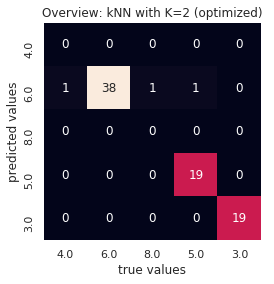

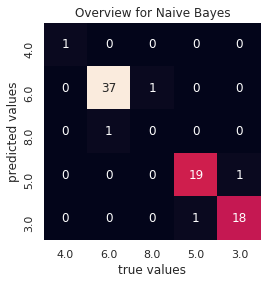

In [55]:
# knn with k = 5
different_cylinder = data_knn['y_test'].unique()

# plot data in a matrix
mat = confusion_matrix(data_knn['y_test'], data_knn['y_predict'])
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=different_cylinder, yticklabels=different_cylinder)
plt.title('Overview: kNN with K=5 ')
plt.xlabel('true values')
plt.ylabel('predicted values')
plt.show()

#*****************************************************************************#
# knn with k = 2

different_cylinder = data_knn_opt['y_test'].unique()

# plot data in a matrix
mat = confusion_matrix(data_knn_opt['y_test'], data_knn_opt['y_predict'])
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=different_cylinder, yticklabels=different_cylinder)
plt.title('Overview: kNN with K=2 (optimized)')
plt.xlabel('true values')
plt.ylabel('predicted values')
plt.show()

#*****************************************************************************#
# naive bayes

different_cylinder = data_nb['y_test'].unique()

# plot data in a matrix
mat = confusion_matrix(data_nb['y_test'], data_nb['y_predict'])
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=different_cylinder, yticklabels=different_cylinder)
plt.title('Overview for Naive Bayes')
plt.xlabel('true values')
plt.ylabel('predicted values')
plt.show()

Sowohl kNN als auch das Gaussian Naive Bayes Modell konnten auf den Trainingsdatensätzen eine Präzision von über 90 Prozent erreichen. Aufgrund der minimal besser Präzision des NB-Modells, würde ich dieses für den gegebenen Fall dem kNN vorziehen.

#### Klassifizierung von Beispieldatensätzen

In [53]:
print('Classification of an example dataset:\n')
# ['mpg', 'horsepower', 'displacement', 'weight', 'acceleration', 'model year', 'origin']
cars = [[25., 100, 98., 2046., 19., 71., 1.],[25, 113., 95., 2228., 14., 71., 3.]] #4
print('Example dataset: ')
print(cars)

print('\nkNN:')
classify_cylinders(cars, knn_5)
print('\nkNN optimized:')
classify_cylinders(cars, knn_2)
print('Gaussian Naive Bayes:')
classify_cylinders(cars, nb_model)

Classification of an example dataset:

Example dataset: 
[[25.0, 100, 98.0, 2046.0, 19.0, 71.0, 1.0], [25, 113.0, 95.0, 2228.0, 14.0, 71.0, 3.0]]

kNN:
Given=[25.0, 100, 98.0, 2046.0, 19.0, 71.0, 1.0], Classified Cylinders: 8.0
Given=[25, 113.0, 95.0, 2228.0, 14.0, 71.0, 3.0], Classified Cylinders: 8.0

kNN optimized:
Given=[25.0, 100, 98.0, 2046.0, 19.0, 71.0, 1.0], Classified Cylinders: 8.0
Given=[25, 113.0, 95.0, 2228.0, 14.0, 71.0, 3.0], Classified Cylinders: 8.0
Gaussian Naive Bayes:
Given=[25.0, 100, 98.0, 2046.0, 19.0, 71.0, 1.0], Classified Cylinders: 4.0
Given=[25, 113.0, 95.0, 2228.0, 14.0, 71.0, 3.0], Classified Cylinders: 4.0


array([70.])